In [2]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import time

In [17]:
print(np.random.normal(0, 1))
np.linspace(1, 10, 20)

0.8789553300918583


array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [18]:
#injected mass (M_injected), single parameter

#recovered mass: 
#recovered mass (M_recovered), randomly select recovered masses from a gaussian distribution of
#sigma and mean at M injected

In [19]:
x = np.random.normal(10, 1)
#np.random.normal(mu, sigma, step)
print(x)

9.339138277720586


In [20]:
def gaussian_distribution(M_inj1, sigma):
    M_recovered = np.random.normal(M_inj1, sigma)
    M_recovered = np.array(M_recovered)
    return M_recovered
#this function would take in a random mass generated by var s, that will get put into the gaussian dist function
#with a predefined sigma 0.001
#a new variable mass_injections is run through a loop to iterate for every mass_inj (randomly produced), an array
#of the same length will iterate. so bascially for every mass produced, there is a recovered mass by the
#np.random.normal into M_recovered with the same sigma and that is 1 injection. we want 10,000 of these.

In [21]:
#gaussian_distribution(10, 0.1)

In [22]:
s1 = 10 + (20 - 10)*np.random.random(100000)
print(s1)
print(len(s1))
#so instead of getting just 1, we should create a normal distribution of mass injections from this interval, so 
#for every value generated we'll create a recovered of that

[12.42075683 13.71305716 14.25761228 ... 18.04738875 10.80729226
 17.32194098]
100000


In [23]:
#M_inj1 = s1
M_inj1 = 10 + (20 - 10)*np.random.random(100000)
sigma = 0.001
#M_recovered1_10k = [gaussian_distribution(M_inj1, sigma) for _ in range(10000)]
#print(len(M_recovered1_10k))
#print(M_recovered1_10k)

In [24]:
M_recovered_values = gaussian_distribution(M_inj1, sigma)
len(M_recovered_values)

100000

In [25]:
train_test_split?

In [26]:
X = M_inj1
y = M_recovered_values
print(X)
print(y)
print(len(X))
print(len(y))
print(np.shape(X))
print(np.shape(y))

[18.59947642 13.93585794 11.63696713 ... 15.66518062 16.80298305
 10.47833844]
[18.59808366 13.93716659 11.63744307 ... 15.6646998  16.80153172
 10.47835455]
100000
100000
(100000,)
(100000,)


In [27]:
st1 = time.time()
M_inj1 = M_inj1.reshape(-1, 1)
M_recovered_values = M_recovered_values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)
RandomForestRegressionModel = RandomForestRegressor()
RandomForestRegressionModel.fit(X_train, y_train)
y_pred = RandomForestRegressionModel.predict(X_test)
print(y_pred)
et1 = time.time()
dt = et1 - st1
print(dt)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/1140858995.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


[12.05488726 16.48234419 16.70770149 ... 19.82472988 16.21873486
 14.48008516]
7.566348075866699


In [28]:
df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['y_test','y_pred'])
df1

,y_test,y_pred
0,12.054713,12.054887
1,16.481598,16.482344
2,16.708421,16.707701
3,17.543241,17.543240
4,14.238482,14.239536
...,...,...
19995,14.178765,14.179053
19996,18.339572,18.340271
19997,19.823762,19.824730
19998,16.217921,16.218735


In [29]:
df1.corr()

,y_test,y_pred
y_test,1.0,1.0
y_pred,1.0,1.0


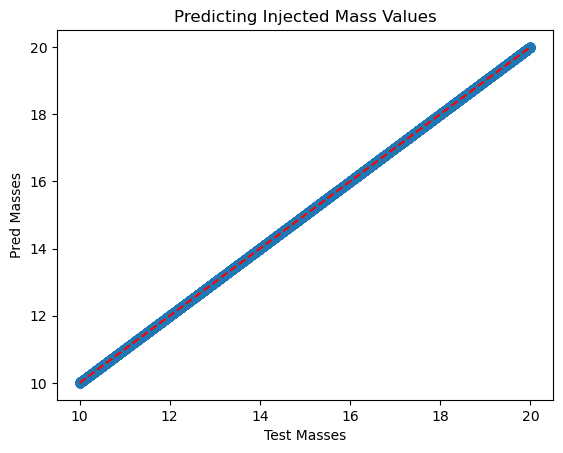

In [79]:
plt.scatter(X_test, y_pred)
plt.plot([10, 20], [10, 20], "r--")
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
#plt.plot(X_test, y_pred, color='k')
plt.show()

In [31]:
mean_y_pred1 = np.mean(y_pred)
print(mean_y_pred1, 'average true mass prediction')
print(np.mean(M_inj1), 'avg mass injected')

15.004921430618499 average true mass prediction
15.00633455698359 avg mass injected


In [32]:
error = (((np.mean(y_pred) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')

99.99058313434419 % accuracy between the predicted injected mass and actual random injected mass based on recovered


In [33]:
train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)

[array([[15.8776774 ],
        [18.76959307],
        [10.95901719],
        ...,
        [19.41921388],
        [12.0099449 ],
        [14.75353028]]),
 array([[12.05471268],
        [16.48159759],
        [16.70842147],
        ...,
        [19.8237622 ],
        [16.21792094],
        [14.48167758]]),
 array([[15.87841867],
        [18.76991485],
        [10.95922547],
        ...,
        [19.4195648 ],
        [12.01076872],
        [14.75202701]]),
 array([[12.05515715],
        [16.48201243],
        [16.70833085],
        ...,
        [19.82240061],
        [16.21771626],
        [14.48008143]])]

In [81]:
#just offset
#gaussian with offset
s2 = 10 + (20 - 10)*np.random.random(100000)
print(s2)
print(len(s2))
#so instead of getting just 1, we should create a normal distribution of mass injections from this interval, so 
#for every value generated we'll create a recovered of that

[15.79104918 11.96765949 15.99834676 ... 13.73049385 11.90567006
 15.24599462]
100000


In [82]:
M_inj2 = 10 + (20 - 10)*np.random.random(100000)
#M_recovered1_10k = [gaussian_distribution(M_inj1, sigma) for _ in range(10000)]
#print(len(M_recovered1_10k))
#print(M_recovered1_10k)

In [83]:
M_recovered_values2 = M_inj2 + 5
len(M_recovered_values)

100000

In [84]:
M_inj2 = M_inj2.reshape(-1, 1)
M_recovered_values2 = M_recovered_values2.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(M_inj2, M_recovered_values2, test_size=0.20, random_state=42)
#connecting M_inj3 results in the exact slope of the actual predictions, i wonder if that means the model is wrong
#or if this is just how you offset with original data to show that this is true offset. 
RandomForestRegressionModel = RandomForestRegressor()
RandomForestRegressionModel.fit(X_train, y_train)
y_pred1 = RandomForestRegressionModel.predict(X_test)
y_pred1

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/1218686133.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


array([17.86166767, 19.40422507, 22.94256719, ..., 22.53979565,
       20.23277909, 19.04226519])

In [87]:
X_test_1 = np.array([14])
y_pred1 = RandomForestRegressionModel.predict(X_test_1.reshape(1, -1))
y_pred1

array([19.00003846])

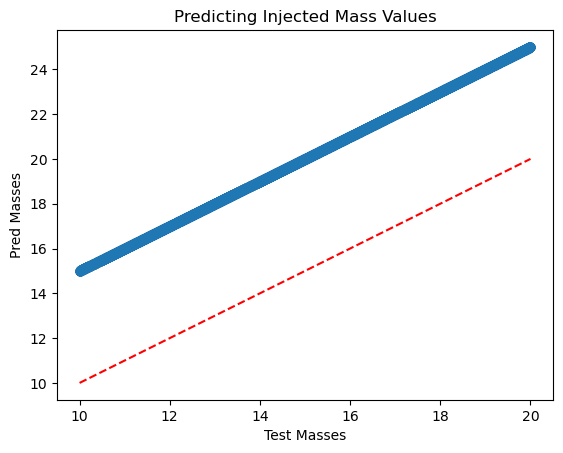

In [85]:
plt.scatter(X_test, y_pred1)
plt.plot([10, 20], [10, 20], "r--")
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
#plt.plot(X_test, y_pred1, color='k')
plt.show()

In [39]:
df2 = pd.DataFrame(data=np.column_stack((X_test, y_pred1)),columns=['y_test','y_pred'])
df2

,y_test,y_pred
0,16.919349,21.919222
1,14.833090,19.833061
2,13.792185,18.792185
3,14.925808,19.925808
4,15.714183,20.714118
...,...,...
19995,15.388812,20.388780
19996,15.020701,20.020498
19997,18.441473,23.441427
19998,10.957600,15.957596


In [40]:
df2.corr()

,y_test,y_pred
y_test,1.0,1.0
y_pred,1.0,1.0


In [41]:
mean_y_pred2 = np.mean(y_pred1)
print(mean_y_pred2, 'average true mass prediction')
print(np.mean(M_inj1), 'avg mass injected')

20.011454666861564 average true mass prediction
15.00633455698359 avg mass injected


In [42]:
error = (((np.mean(y_pred1) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')

133.35338213920272 % accuracy between the predicted injected mass and actual random injected mass based on recovered


In [43]:
#gaussian with offset
s3 = 10 + (20 - 10)*np.random.random(100000)
print(s3)
print(len(s3))
#so instead of getting just 1, we should create a normal distribution of mass injections from this interval, so 
#for every value generated we'll create a recovered of that

[10.90642854 14.00759204 14.9912284  ... 12.63044671 15.37507348
 18.32836077]
100000


In [44]:
M_inj3 = 10 + (20 - 10)*np.random.random(100000)
sigma = 0.001
#M_recovered1_10k = [gaussian_distribution(M_inj1, sigma) for _ in range(10000)]
#print(len(M_recovered1_10k))
#print(M_recovered1_10k)

In [45]:
M_recovered_values3 = gaussian_distribution(M_inj3 + 5, sigma)
len(M_recovered_values3)

100000

In [46]:
M_inj3 = M_inj3.reshape(-1, 1)
M_recovered_values3 = M_recovered_values3.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values3, test_size=0.20, random_state=42)
RandomForestRegressionModel = RandomForestRegressor()
RandomForestRegressionModel.fit(X_train, y_train)
y_pred2 = RandomForestRegressionModel.predict(X_test)
y_pred2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/301306982.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


array([22.17719119, 20.13611794, 21.78925726, ..., 23.10214191,
       20.22435441, 21.43756284])

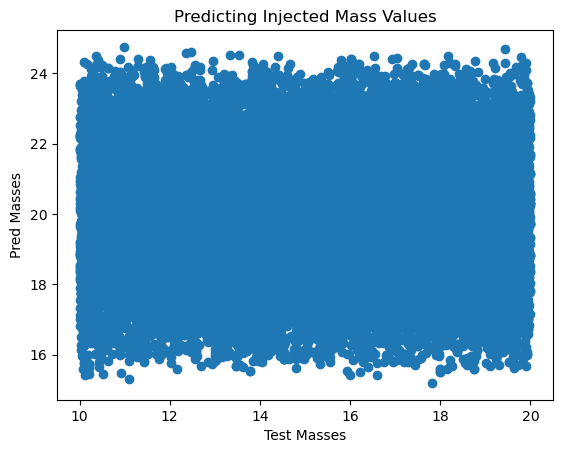

In [47]:
plt.scatter(X_test, y_pred2)
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
#plt.plot(X_test, y_pred1, color='k')
plt.show()

In [48]:
df3 = pd.DataFrame(data=np.column_stack((X_test, y_pred2)),columns=['X_test','y_pred'])
df3

,X_test,y_pred
0,12.054713,22.177191
1,16.481598,20.136118
2,16.708421,21.789257
3,17.543241,23.591870
4,14.238482,21.507001
...,...,...
19995,14.178765,18.588264
19996,18.339572,21.237667
19997,19.823762,23.102142
19998,16.217921,20.224354


In [49]:
df3.corr()

,X_test,y_pred
X_test,1.000000,0.011485
y_pred,0.011485,1.000000


In [50]:
mean_y_pred3 = np.mean(y_pred2)
print(mean_y_pred3, 'average true mass prediction')
print(np.mean(M_inj3), 'avg mass injected')
error = (((np.mean(y_pred2) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')

19.996399869118875 average true mass prediction
14.995748891200249 avg mass injected
133.25305918768169 % accuracy between the predicted injected mass and actual random injected mass based on recovered


In [51]:
#FUNCTION CALLS OF WORKING SINGLE MASS PREDICTION VALUES

In [52]:
#regular model normal(M_inj, sigma)
#offset model M_inj + c
#offset and normal(M_inj + c, sigma)

In [68]:
def one_mass_prediction(amt_inj, sig):
    st1 = time.time()
    M_inj1 = 10 + (20 - 10)*np.random.random(amt_inj)
    #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
    #sigma = 0.001
    sigma = sig
    M_recovered_values = gaussian_distribution(M_inj1, sigma)
    M_inj1 = M_inj1.reshape(-1, 1)
    M_recovered_values = M_recovered_values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    print(y_pred)
    print(X_test)
    et1 = time.time()
    dt = et1 - st1
    print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['y_test','y_pred'])
    df2 = df1.corr()
    plt.scatter(X_test, y_pred)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    mean_y_pred1 = np.mean(y_pred)
    print(mean_y_pred1, 'average true mass prediction')
    print(np.mean(M_inj1), 'avg mass injected')
    error = (((np.mean(y_pred) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et2 = time.time()
    dt1 = et2 - st1
    print(dt1,'total time to run')
    return X_test, y_pred, df2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/3037206124.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


[19.18240793 18.19185214 10.69840531 ... 16.14764994 12.19700684
 17.71528934]
[[19.18179736]
 [18.19217144]
 [10.69914825]
 ...
 [16.14809345]
 [12.19771566]
 [17.71355978]]
7.460464000701904 time to train model


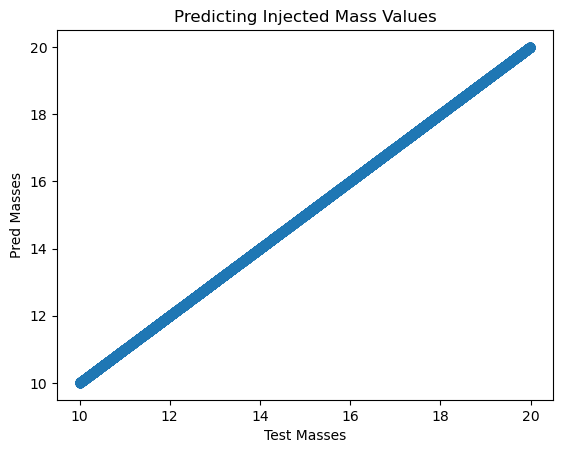

14.984914442260596 average true mass prediction
14.988551178040609 avg mass injected
99.97573657562486 % accuracy between the predicted injected mass and actual random injected mass based on recovered
7.563866853713989 total time to run


(array([[19.18179736],
        [18.19217144],
        [10.69914825],
        ...,
        [16.14809345],
        [12.19771566],
        [17.71355978]]),
 array([19.18240793, 18.19185214, 10.69840531, ..., 16.14764994,
        12.19700684, 17.71528934]),
         y_test  y_pred
 y_test     1.0     1.0
 y_pred     1.0     1.0)

In [69]:
one_mass_prediction(100000,0.001)

In [55]:
def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                        random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [56]:
X_test

array([[12.05471268],
       [16.48159759],
       [16.70842147],
       ...,
       [19.8237622 ],
       [16.21792094],
       [14.48167758]])

In [57]:
M_inj2 = 10 + (20 - 10)*np.random.random(100000)
M_rec = M_inj2 + 5
M_inj2 = M_inj2.reshape(-1, 1)
M_rec = M_rec.reshape(-1, 1)
x_test, pred, predictor = mass_predictor(M_inj2, M_rec)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [76]:
masses = np.array([15, 17, 19])
X = predictor(masses)
#print(predictor(masses))

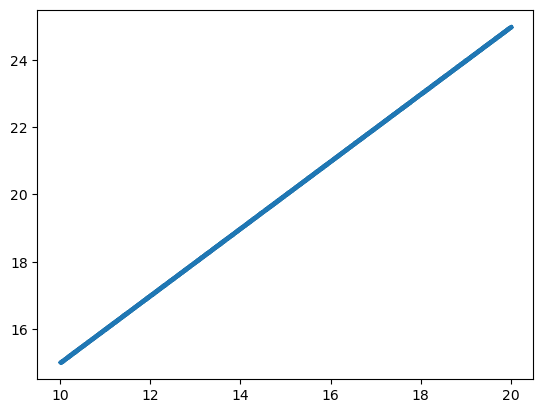

In [77]:
plt.scatter(x_test, pred, s=2)

In [70]:
def one_mass_prediction_offset(amt_inj, c):
    st1 = time.time()
    M_inj = 10 + (20 - 10)*np.random.random(amt_inj)
    #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
    #sigma = 0.001
    M_recovered_values = M_inj + c
    M_inj = M_inj.reshape(-1, 1)
    M_recovered_values = M_recovered_values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_recovered_values, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    print(y_pred)
    print(X_test)
    et1 = time.time()
    dt = et1 - st1
    print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
    df2 = df1.corr()
    plt.scatter(X_test, y_pred, s=2)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    mean_y_pred = np.mean(y_pred)
    print(mean_y_pred, 'average true mass prediction')
    print(np.mean(M_inj), 'avg mass injected')
    error = (((np.mean(y_pred) - np.mean(M_inj)) / np.mean(M_inj)) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et2 = time.time()
    dt1 = et2 - st1
    print(dt1,'total time to run')
    return X_test, y_pred, df2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/2781004829.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


[19.02437564 18.72906926 15.00024252 ... 19.79993161 15.30369588
 15.86142296]
[[14.02440298]
 [13.72900087]
 [10.00016711]
 ...
 [14.80008248]
 [10.30367356]
 [10.86135613]]
7.382280111312866 time to train model


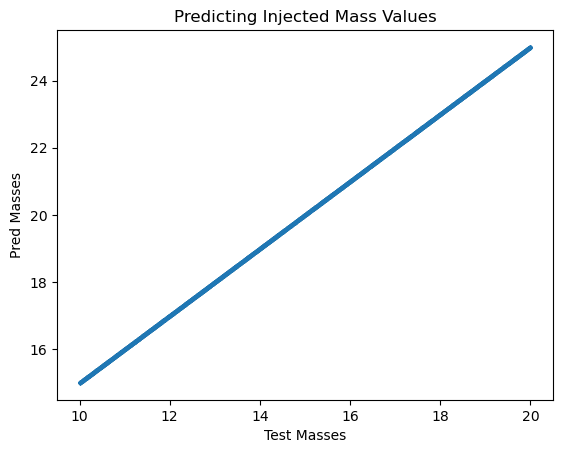

20.02277968047094 average true mass prediction
14.99031898641121 avg mass injected
133.57140497558242 % accuracy between the predicted injected mass and actual random injected mass based on recovered
7.472491979598999 total time to run


(array([[14.02440298],
        [13.72900087],
        [10.00016711],
        ...,
        [14.80008248],
        [10.30367356],
        [10.86135613]]),
 array([19.02437564, 18.72906926, 15.00024252, ..., 19.79993161,
        15.30369588, 15.86142296]),
         X_test  y_pred
 X_test     1.0     1.0
 y_pred     1.0     1.0)

In [71]:
one_mass_prediction_offset(100000, 5)

In [72]:
def one_mass_prediction_offset_gaussian(amt_inj, sig, c):
    st1 = time.time()
    M_inj3 = 10 + (20 - 10)*np.random.random(amt_inj)
    sigma = sig
    M_recovered_values3 = gaussian_distribution(M_inj3 + c, sigma)
    M_inj3 = M_inj3.reshape(-1, 1)
    M_recovered_values3 = M_recovered_values3.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(M_inj3, M_recovered_values3, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    print(y_pred)
    print(X_test)
    et1 = time.time()
    dt = et1 - st1
    print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['y_test','y_pred'])
    df2 = df1.corr()
    plt.scatter(X_test, y_pred)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    mean_y_pred = np.mean(y_pred)
    print(mean_y_pred, 'average true mass prediction')
    print(np.mean(M_inj3), 'avg mass injected')
    error = (((np.mean(y_pred) - np.mean(M_inj3)) / np.mean(M_inj3)) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et2 = time.time()
    dt1 = et2 - st1
    print(dt1,'total time to run')
    return X_test, y_pred, df2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_9713/3945510012.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


[23.08459314 18.07485663 19.3827048  ... 16.94886787 22.67961907
 18.64722468]
[[18.08420771]
 [13.07336912]
 [14.38176579]
 ...
 [11.94850148]
 [17.67957307]
 [13.64696681]]
7.5865137577056885 time to train model


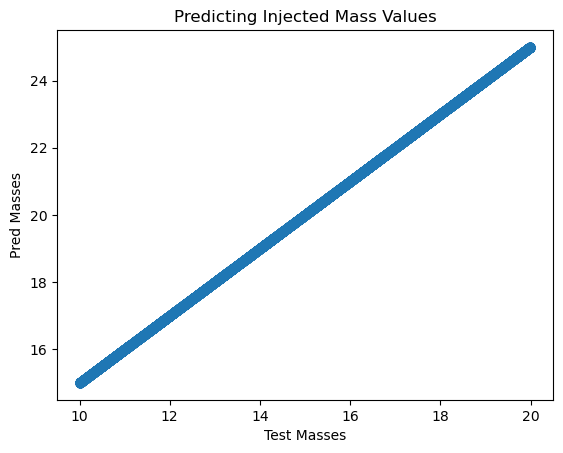

20.000716707816093 average true mass prediction
14.993135313737259 avg mass injected
133.39916094461378 % accuracy between the predicted injected mass and actual random injected mass based on recovered
7.683971643447876 total time to run


(array([[18.08420771],
        [13.07336912],
        [14.38176579],
        ...,
        [11.94850148],
        [17.67957307],
        [13.64696681]]),
 array([23.08459314, 18.07485663, 19.3827048 , ..., 16.94886787,
        22.67961907, 18.64722468]),
         y_test  y_pred
 y_test     1.0     1.0
 y_pred     1.0     1.0)

In [73]:
one_mass_prediction_offset_gaussian(100000, 0.001, 5)

In [ ]:
#INCORRECT MODEL BELOW DONT USE BUT RECALL FOR HOW YOU FIXED IT

In [129]:
s = 10 + (20 - 10)*np.random.random(1)
print(s)

[16.73786069]


In [130]:
#these would be the input masses
M_inj = s
sigma = 0.001
M_injected_100k = [gaussian_distribution(M_inj, sigma) for _ in range(10000)]
#we need 100K true masses that are injected for 100K recovered that are predicted 1:1 ratio
M_injected_100k = np.array(M_injected_100k)
print(M_injected_100k)
print(len(M_injected_100k))

[[16.73615034]
 [16.73677923]
 [16.73971605]
 ...
 [16.73802523]
 [16.73891814]
 [16.7365014 ]]
10000


In [16]:
#now i need to make a recovered mass of all these 100K
M_recovered_100k = gaussian_distribution(M_injected_100k, sigma) 
print(M_recovered_100k)
print(len(M_recovered_100k))

[[12.6897757 ]
 [12.68878054]
 [12.68768291]
 ...
 [12.68953586]
 [12.68883927]
 [12.68996858]]
1000000


In [17]:
X = M_injected_100k
y = M_recovered_100k
print(X)
print(y)
print(len(X))
print(len(y))
print(np.shape(X))
print(np.shape(y))

[[12.68972859]
 [12.6892751 ]
 [12.68843126]
 ...
 [12.68762336]
 [12.68884218]
 [12.68957103]]
[[12.6897757 ]
 [12.68878054]
 [12.68768291]
 ...
 [12.68953586]
 [12.68883927]
 [12.68996858]]
1000000
1000000
(1000000, 1)
(1000000, 1)


In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

X.reshape(-1, 1)
y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
RandomForestRegressionModel = RandomForestRegressor()
RandomForestRegressionModel.fit(X_train, y_train)
y_pred = RandomForestRegressionModel.predict(X_test)
y_pred

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/3940072435.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


array([12.68759258, 12.69004283, 12.68932796, ..., 12.68953554,
       12.68929474, 12.68928703])

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.0010022686649942688

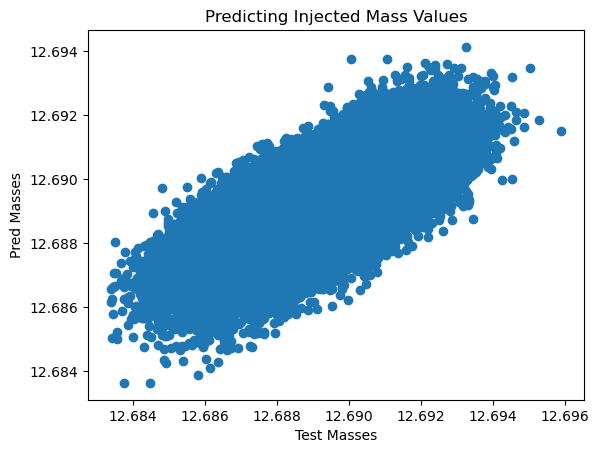

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
#plt.plot(X_test, y_pred, color='k')
plt.show()

In [21]:
#measuring correlation, adding more datapoints to increase runtime and see how will correlation be affected 
#eventually getting to offset

In [22]:
'''working code above'''

'working code above'

In [23]:
print(len(y_test))
print(len(y_pred))
print(len(X_test))
print(np.shape(y_test))
print(np.shape(y_pred))

200000
200000
200000
(200000, 1)
(200000,)


In [24]:
y_pred_reshaped = y_pred.reshape(-1, 1)

In [25]:
print(np.shape(y_pred_reshaped))
print(y_pred_reshaped)
print(np.shape(y_test))

(200000, 1)
[[12.6876025 ]
 [12.69004242]
 [12.68933482]
 ...
 [12.68953653]
 [12.68929704]
 [12.68929437]]
(200000, 1)


In [26]:
import pandas as pd

df = pd.DataFrame(data=np.column_stack((y_test, y_pred_reshaped)),columns=['y_test','y_pred'])
df

,y_test,y_pred
0,12.686024,12.687603
1,12.690576,12.690042
2,12.689828,12.689335
3,12.689709,12.689109
4,12.687993,12.689042
...,...,...
199995,12.687700,12.688761
199996,12.688822,12.688214
199997,12.689434,12.689537
199998,12.687726,12.689297


In [27]:
df.corr()

,y_test,y_pred
y_test,1.000000,0.704755
y_pred,0.704755,1.000000


In [28]:
if len(y_test)==len(y_pred_reshaped):
    Sum_y_test_y_pred = sum((y_test-y_test.mean())*(y_pred_reshaped-y_pred_reshaped.mean()))
    Sum_y_test_squared = sum((y_test-y_test.mean())**2)
    Sum_y_pred_reshaped_squared = sum((y_pred_reshaped-y_pred_reshaped.mean())**2)      
    corr = Sum_y_test_y_pred / np.sqrt(Sum_y_test_squared * Sum_y_pred_reshaped_squared)

print(corr)

[0.70475515]


In [29]:
import time

In [93]:
def true_mass_prediction(n, sigma):    
    #these would be the input masses
    #M_inj = np.random.normal(s, .00001)
    st = time.time()
    
    s = 10 + (20 - 10)*np.random.random(1)
    print(s, 'random injected mass')
    M_inj = s
    #sigma = 0.001
    #when I change M_inj and sigma the masses don't change in magnitude or sign
    M_injected_100k = [gaussian_distribution(M_inj, sigma) for _ in range(n)]
    #we need 100K true masses that are injected for 100K recovered that are predicted 1:1 ratio
    M_injected_100k = np.array(M_injected_100k)
    M_recovered_100k = gaussian_distribution(M_injected_100k, sigma) 
    X = M_injected_100k
    y = M_recovered_100k
    X.reshape(-1, 1)
    y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    y_pred
    mean_y_pred = np.mean(y_pred)
    print(mean_y_pred, 'average true mass prediction')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    y_pred_reshaped = y_pred.reshape(-1, 1)
    df = pd.DataFrame(data=np.column_stack((y_test, y_pred_reshaped)),columns=['y_test','y_pred'])
    df.corr()
    error = (((np.mean(y_pred) - s) / s) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et = time.time()
    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    return y_pred, df.corr()

[18.0594167] random injected mass
18.059413953507352 average true mass prediction


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/2933936184.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


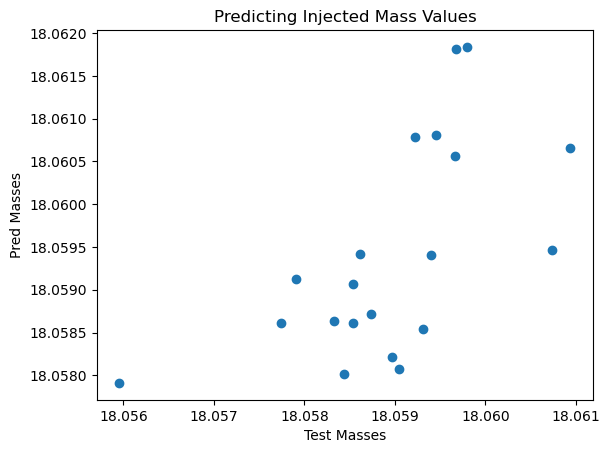

[99.99998481] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 0.23977303504943848 seconds


(array([18.06183859, 18.05807735, 18.05906975, 18.05791081, 18.0607879 ,
        18.05861492, 18.06055862, 18.05821432, 18.0594118 , 18.05802068,
        18.05863098, 18.05871876, 18.06181329, 18.05912619, 18.05853562,
        18.06065228, 18.05861492, 18.05941585, 18.05946097, 18.06080548]),
           y_test    y_pred
 y_test  1.000000  0.604502
 y_pred  0.604502  1.000000)

In [94]:
true_mass_prediction(100, 0.001)

[19.54371758] random injected mass
19.543639590427997 average true mass prediction


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/2933936184.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


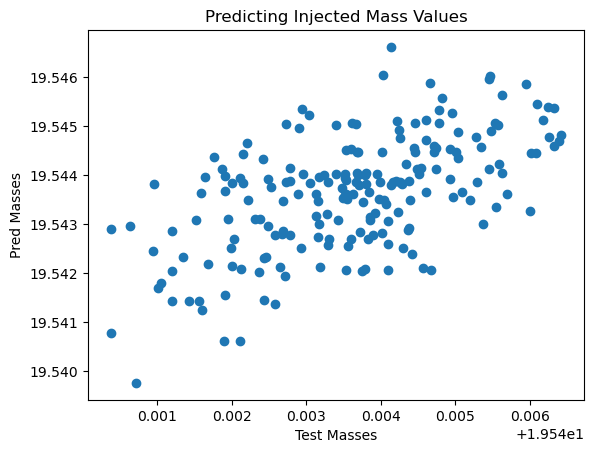

[99.99960096] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 0.24905896186828613 seconds


(array([19.54422802, 19.54310669, 19.5436544 , 19.54348244, 19.54477782,
        19.54362122, 19.54326579, 19.54345022, 19.54348874, 19.54270061,
        19.54465956, 19.54488804, 19.5439194 , 19.54269822, 19.54145672,
        19.54385552, 19.5425266 , 19.5406275 , 19.54365598, 19.54424251,
        19.54256018, 19.54383192, 19.54457097, 19.54402352, 19.54336085,
        19.54443028, 19.54314732, 19.5440023 , 19.5438342 , 19.54213175,
        19.54194039, 19.5438272 , 19.54605955, 19.54506098, 19.54252714,
        19.5458845 , 19.54143414, 19.54394028, 19.54316475, 19.54380516,
        19.54451348, 19.54662381, 19.54324791, 19.54355682, 19.5436222 ,
        19.54448108, 19.54209043, 19.54291002, 19.54230805, 19.54471543,
        19.54352163, 19.54384892, 19.54352162, 19.54281278, 19.54436199,
        19.54564005, 19.54286331, 19.54385408, 19.54208745, 19.54390261,
        19.54282413, 19.54386346, 19.54283496, 19.54386346, 19.54361689,
        19.54513164, 19.54404863, 19.54386666, 19.5

In [95]:
true_mass_prediction(1000, 0.001)

[13.71846566] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/2933936184.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


13.718422967536611 average true mass prediction


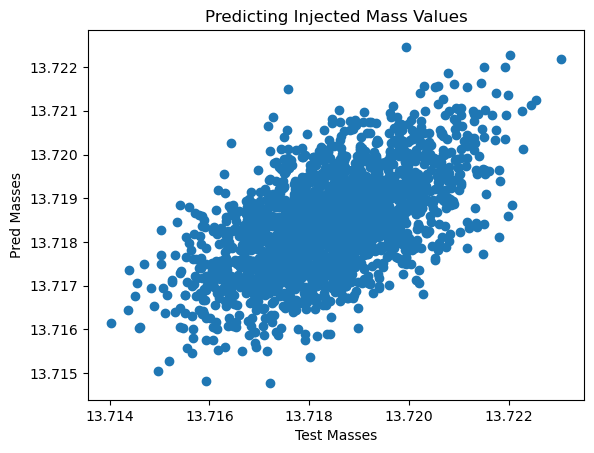

[99.99968879] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 0.857572078704834 seconds


(array([13.71793625, 13.71892989, 13.71689356, ..., 13.72034125,
        13.71737942, 13.71991706]),
           y_test    y_pred
 y_test  1.000000  0.587903
 y_pred  0.587903  1.000000)

In [96]:
true_mass_prediction(10000, 0.001)

[12.10649742] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/2933936184.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


12.106495091447698 average true mass prediction


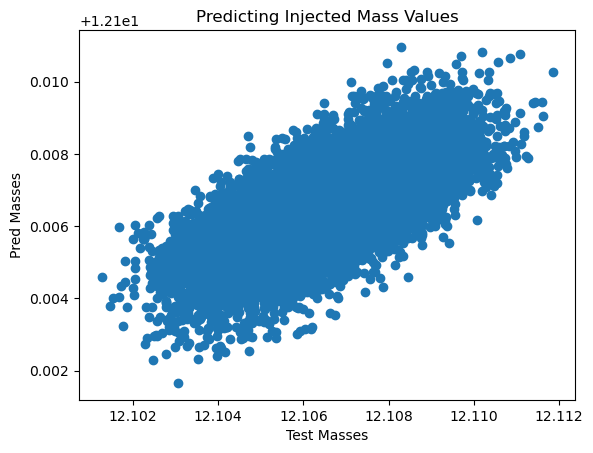

[99.99998073] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 6.472637176513672 seconds


(array([12.10698194, 12.1072616 , 12.10617658, ..., 12.105853  ,
        12.1057788 , 12.10823295]),
           y_test    y_pred
 y_test  1.000000  0.681758
 y_pred  0.681758  1.000000)

In [97]:
true_mass_prediction(100000, 0.001)

[12.26218673] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/2933936184.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


12.262189684199363 average true mass prediction


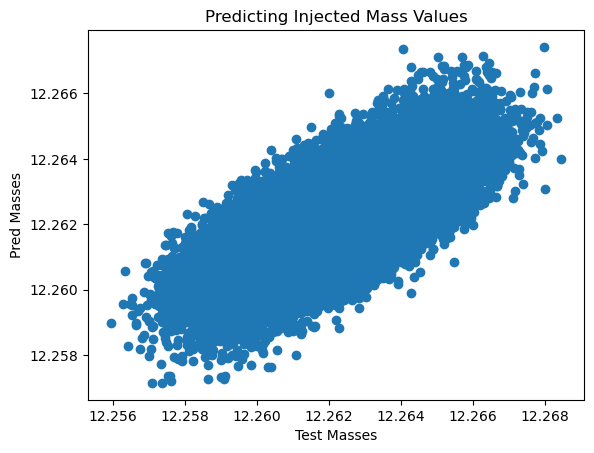

[100.00002409] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 58.189412117004395 seconds


(array([12.26449157, 12.26040331, 12.26240221, ..., 12.26220448,
        12.2628307 , 12.26482449]),
           y_test    y_pred
 y_test  1.000000  0.702876
 y_pred  0.702876  1.000000)

In [98]:
true_mass_prediction(1000000, 0.001)

In [92]:
np.random.normal(10, 0)

10.0

[12.49089585] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_95780/1390255044.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


12.490895701366803 average true mass prediction


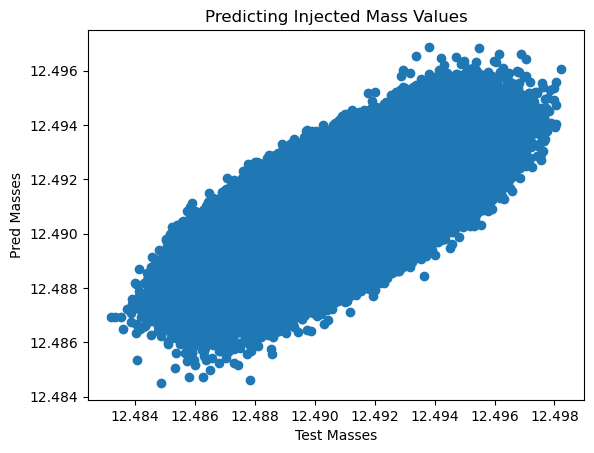

[99.9999988] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 7772.0691158771515 seconds


(array([12.49099327, 12.49034708, 12.49027211, ..., 12.4897814 ,
        12.49057314, 12.49118996]),
           y_test    y_pred
 y_test  1.000000  0.706833
 y_pred  0.706833  1.000000)

In [31]:
true_mass_prediction(100000000)

[11.04515228] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_95780/1390255044.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


11.04515239866443 average true mass prediction


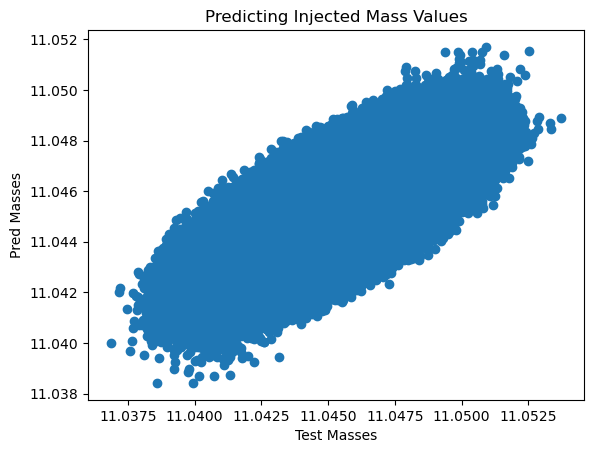

[100.00000107] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 50173.15856695175 seconds


(array([11.04461099, 11.04627451, 11.04540548, ..., 11.04605449,
        11.04364804, 11.04541722]),
           y_test    y_pred
 y_test  1.000000  0.707059
 y_pred  0.707059  1.000000)

In [32]:
true_mass_prediction(500000000)

In [ ]:
#we want to essentially eliminate to need for using bibly realtime
#these functions serve to optimize runtime on the detection pipeline
#by using this offset we are essentially checking how good our model would do in realtime
#equivalent to giving our model false injections and hoping it recongizes them being off set
#take the true_mass_prediction function and take out the s = np.random.random(1) and sigma = 0.001
#to the M_inj to instead be a recovered parameter estimation prediction of  mass input offset = ?, sigma =?
#output should be an M_recovered = np.random.normal(Mass input + offset, sigma)
#return M_recovered prediction
#EM-bright -> detection pipelines (in seconds)

In [99]:
def create_recovered_params(m_injections, offset, sigma):    
    #these would be the input masses
    #M_inj = np.random.normal(s, .00001)
    st = time.time()
    
    s = 10 + (20 - 10)*np.random.random(1)
    print(s, 'random injected mass')
    M_inj = s + .5
    #sigma = 0.001
    #when I change M_inj and sigma the masses don't change in magnitude or sign
    M_injected_100k = [M_inj for _ in range(m_injections)]
    #we need 100K true masses that are injected for 100K recovered that are predicted 1:1 ratio
    M_injected_100k = np.array(M_injected_100k)
    M_recovered_100k = gaussian_distribution(M_injected_100k, sigma) 
    X = M_injected_100k
    y = M_recovered_100k
    X.reshape(-1, 1)
    y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    y_pred
    mean_y_pred = np.mean(y_pred)
    print(mean_y_pred, 'average true mass prediction')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    y_pred_reshaped = y_pred.reshape(-1, 1)
    df = pd.DataFrame(data=np.column_stack((y_test, y_pred_reshaped)),columns=['y_test','y_pred'])
    df.corr()
    error = (((np.mean(y_pred) - s) / s) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et = time.time()
    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    return y_pred, df.corr()

[13.79796946] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/3674597263.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


14.29915562481545 average true mass prediction


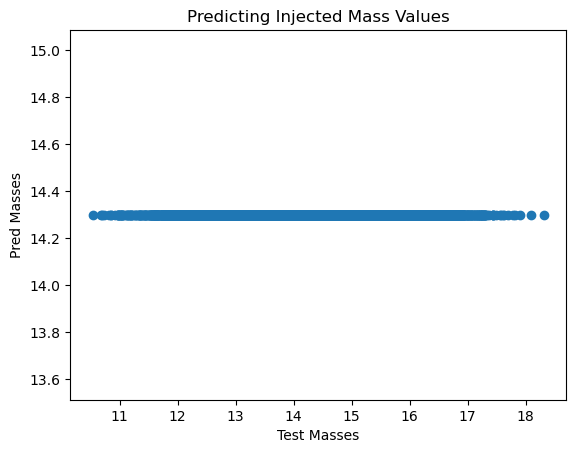

[103.63231825] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 0.443087100982666 seconds


(array([14.29915562, 14.29915562, 14.29915562, ..., 14.29915562,
        14.29915562, 14.29915562]),
         y_test  y_pred
 y_test     1.0     NaN
 y_pred     NaN     NaN)

In [104]:
create_recovered_params(100000, 1, 1)

In [110]:
def create_recovered_params_gaussian(m_injections, offset, sigma):    
    #these would be the input masses
    #M_inj = np.random.normal(s, .00001)
    st = time.time()
    
    s = 10 + (20 - 10)*np.random.random(1)
    print(s, 'random injected mass')
    #picking a random mass between [10, 20] and adding a constant C offset
    M_inj = s + offset
    #sigma = 0.001
    #when I change M_inj and sigma the masses don't change in magnitude or sign
    M_injected_100k = [gaussian_distribution(M_inj, sigma) for _ in range(m_injections)]
    #we need 100K true masses that are injected for 100K recovered that are predicted 1:1 ratio
    M_injected_100k = np.array(M_injected_100k)
    M_recovered_100k = gaussian_distribution(M_injected_100k, sigma) 
    X = M_injected_100k
    y = M_recovered_100k
    X.reshape(-1, 1)
    y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    y_pred
    mean_y_pred = np.mean(y_pred)
    print(mean_y_pred, 'average true mass prediction')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    y_pred_reshaped = y_pred.reshape(-1, 1)
    df = pd.DataFrame(data=np.column_stack((y_test, y_pred_reshaped)),columns=['y_test','y_pred'])
    df.corr()
    error = (((np.mean(y_pred) - s) / s) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et = time.time()
    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    return y_pred, df.corr()

[11.35850918] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/1552347592.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


12.351452456470865 average true mass prediction


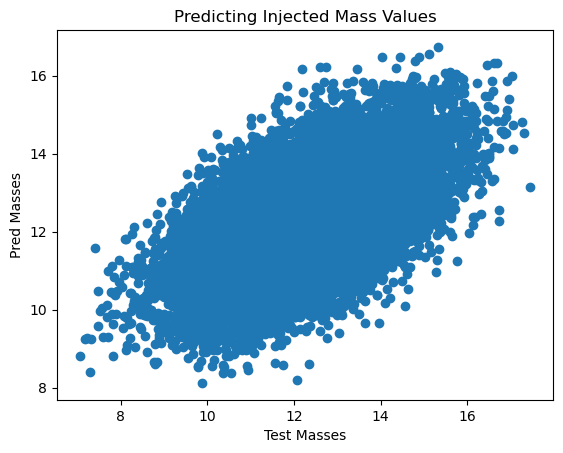

[108.74184505] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 13.199336290359497 seconds


(array([13.35060495, 10.63543058, 13.46519945, ..., 13.00877268,
        10.81174895, 13.94043003]),
           y_test    y_pred
 y_test  1.000000  0.584998
 y_pred  0.584998  1.000000)

In [116]:
create_recovered_params_gaussian(100000, 1, 1)

[18.82095848] random injected mass


/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_53712/1552347592.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


18.82095848349855 average true mass prediction


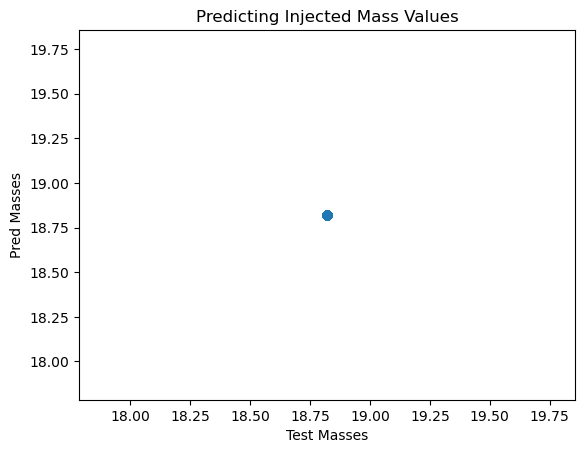

[100.] % accuracy between the predicted injected mass and actual random injected mass based on recovered
Execution time: 1.576390027999878 seconds


(array([18.82095848, 18.82095848, 18.82095848, ..., 18.82095848,
        18.82095848, 18.82095848]),
         y_test  y_pred
 y_test     NaN     NaN
 y_pred     NaN     NaN)

In [117]:
create_recovered_params_gaussian(100000, 0, 0)